# &emsp; Case 1
Jukka Holopainen, Merja Leisti, Matti Närhi <br>
Modified last 2.2.2020  <br>
Helsinki Metropolia University of Applied Sciences<br><br>
Background<br>
In this document we try to create and train a dense neural network to predict to classify the presence of heart disease. The predict will be made by 13 varying attribute values. The main objective is to find the simplest, fastest and smallest possible model and settings that solves the predicting problem most accurately.<br><br> 
Introduction <br>
The data is collected from the Cleveland Clinic Foundation. The creators of the data are: V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D. The donor of this project is David W. Aha. The data creating date is July, 1988.<br>
This data file has been "processed" – which means that instead of containing 76 attributes it only contains 13 attributes. These thirteen are: age, sex, chestpain, resting blood pressure, cholestrol, fasting blood suger, resting electrocardiograph, maximum heart rate, exercise induced angina, ST depression induced by exercise, the slope of the peak exercise ST segment,  number of major vessels and the defect type. All attributes are numeric-valued.<br>
The names and social security numbers of the patients have been removed from the database, and replaced with dummy values. Number of Instances in this data is 303. The instance mean age of this material is 54 years. 68% of the patients are male, 32% are female.<br><br>
In the following we will describe the steps of creating the neural network required, starting with downloading the required libraries.

In [76]:
%pylab inline
import pandas as pd
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


C:\Users\Matti\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test', 'time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


We download the data. At this point and just in case we also download three additional databases concerning heart disease diagnosis: Hungarian data, Long Beach -va data and Switzerland data:

In [77]:
url = r'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/'
cleveData = url + r'cleveland.data'
hungarianData = url + r'hungarian.data'
switchData = url + r'switzerland.data'
cleanCleveData = url + r'processed.cleveland.data'

print(cleveData +'\n' +  hungarianData + '\n' + switchData + '\n' + cleanCleveData)

https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data
https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/hungarian.data
https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/switzerland.data
https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data


1. age
2. sex
3. cp = chestpain type values 1 to 4
4. trestbds = resting blood pressure in mm hg
5. chol = cholestrorol
6. fbs = fasting blood suger
7. restecg = resting electrocardiographic result 0 to 2
8. thalach = maximum heart rate achieved
9. exang = exercise induced angina 1 true 0 false
10. oldpeak = ST depression induced by exercise relative to rest
11. slope = the slope of the peak exercise ST segment 1 to 3
12. ca = number of major vessels colored by flourosopy 0-3
13. thal = 3 normal 6 fixed defect 7 reversable defect
14. num = diagnos of heart disease

We give the name, 'dfCC', to our file. And design the data table by giving the right headings for the columns and by preventing the table to put the first row as a heading. And start preprocessing by replacing the missing values by question mark.

In [78]:
dfCC = pd.read_csv(cleanCleveData, index_col = None, header = None, na_values = '?')
#dfCC = dfCC.rename(columns={0: "age", 1: "sex", 2: "cp", 3: "trestbds", 4: "chol", 
 #                           5: "fbs", 6: "restecg", 7: "thalach", 8: "exang", 9: "oldpeak", 
  #                          10: "slope", 11: "ca", 12: "thal", 13: "num"})

In [79]:
dfCC.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


We keep on preprocessing and use interpolate method for missing data points. This method performs a linear interpolation at missing data points:

In [80]:
dfCC = dfCC.interpolate()
dfCC.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


We still keep on preprocessing. We rescale the numeric data values in order to get equivalent magnitude for all the parametres. We use method standardization, which rescales data to have a mean of 0 and a standard deviation of 1. For standardization we use a method scaling features to lie between a given minimum and maximum
value, so called MinMaxScaler. For potential outliers we use robustscaler.


In [81]:
minmax_scaler = preprocessing.MinMaxScaler()
dfCC[[0, 7]] = minmax_scaler.fit_transform(dfCC[[0, 7]])
dfCC[[2, 6,10,11,12,13]] = minmax_scaler.fit_transform(dfCC[[2, 6,10,11,12,13]])

robustscaler = preprocessing.RobustScaler()
dfCC[[3,4,9]] = robustscaler.fit_transform(dfCC[[3,4,9]])
dfCC.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.708333,1.0,0.000000,0.75,-0.125000,1.0,1.0,0.603053,0.0,0.9375,1.0,0.000000,0.75,0.00
1,0.791667,1.0,1.000000,1.50,0.703125,0.0,1.0,0.282443,1.0,0.4375,0.5,1.000000,0.00,0.50
2,0.791667,1.0,1.000000,-0.50,-0.187500,0.0,1.0,0.442748,1.0,1.1250,0.5,0.666667,1.00,0.25
3,0.166667,1.0,0.666667,0.00,0.140625,0.0,0.0,0.885496,0.0,1.6875,1.0,0.000000,0.00,0.00
4,0.250000,0.0,0.333333,0.00,-0.578125,0.0,1.0,0.770992,0.0,0.3750,0.0,0.000000,0.00,0.00


Then we distribute our data to two segments: training set and testing set. We put the split point at 80%. And give the name, 'data' to our training set and the name, 'testData' to our test set.<br><br>
Then we build the first version of our neural network, giving it three layesr: two hidden layers and the output. The hidden layers have 39 neurons and 16 neurons and the acticvation function n both is relu. The outputlayer has one output. <br>We use optimizer 'rmsprop', our loss function is 'mse', and we examine the result by considering the mean average error. We take batches of size 26 rows, execute 50 epochs and use 20% of training data for validation.

In [82]:
msk = np.random.rand(len(dfCC)) < 0.8
train = dfCC[msk] 
test = dfCC[~msk]
print(str(len(train)) +'\n'+ str(len(test)))
data = train.loc[:, 0:12]
labels = 1.0*(train.loc[:, 13] > 0)

testData = test.loc[:, 0:12]
testLabels = 1.0*(test.loc[:, 13] > 0)

#making neuralnetwork 
model = Sequential()
#model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(16, activation='relu'))

#model.add(Dense(39, kernel_regularizer = regularizers.l2(0.05), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(16,kernel_regularizer = regularizers.l2(0.05), activation='relu'))

#model.add(Dense(39, kernel_regularizer = regularizers.l1(0.08), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(16, activation='relu'))

model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
model.add(Dropout(0.10))
model.add(Dense(16, activation='relu'))

model.add(Dense(1))
#model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])

history = model.fit(data, labels, epochs=50, batch_size=26, verbose=0, validation_split = 0.2) 





247
56


56/56 [==============================] - 0s 353us/sample - loss: 0.1670 - mean_absolute_error: 0.2980


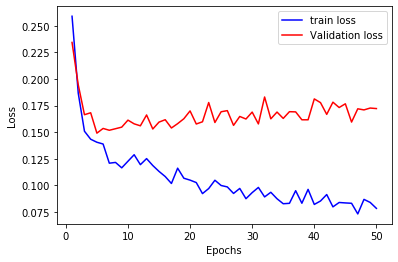

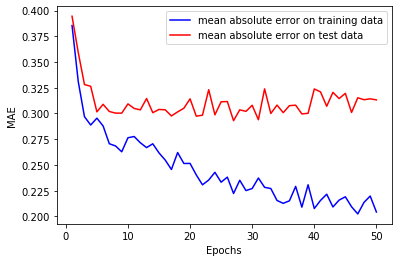

In [83]:
#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

#acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']

time = range(1,len(loss)+1)

test_loss, test_acc = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="train loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")

plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on test data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

In [84]:
model = Sequential()
#model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(16, activation='relu'))

#model.add(Dense(39, kernel_regularizer = regularizers.l2(0.05), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(16,kernel_regularizer = regularizers.l2(0.05), activation='relu'))

#model.add(Dense(39, kernel_regularizer = regularizers.l1(0.08), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(16, activation='relu'))

model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
model.add(Dropout(0.10))
model.add(Dense(16, activation='relu'))

model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(data, labels, epochs=7, batch_size=26, verbose=0, validation_split = 0.2)



56/56 [==============================] - 0s 199us/sample - loss: 0.1936 - mean_absolute_error: 0.3627


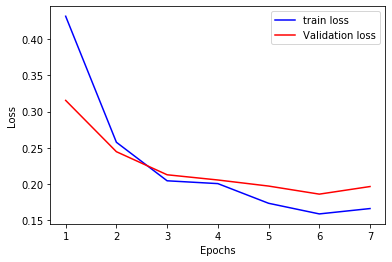

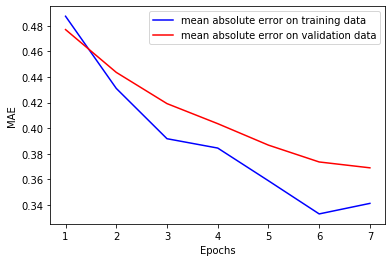

In [85]:
#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="train loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

56/56 [==============================] - 0s 36us/sample - loss: 0.1850 - mean_absolute_error: 0.3600


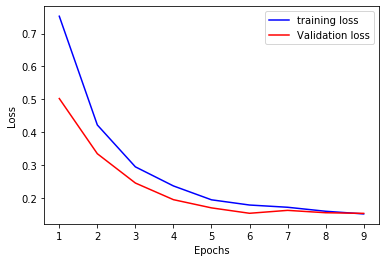

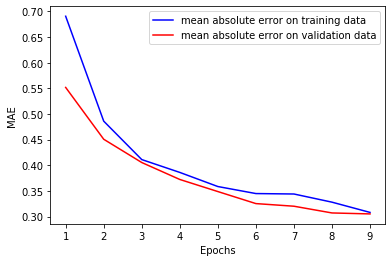

In [86]:
model = Sequential()
#model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(16, activation='relu'))

#model.add(Dense(39, kernel_regularizer = regularizers.l2(0.05), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(16,kernel_regularizer = regularizers.l2(0.05), activation='relu'))

#model.add(Dense(39, kernel_regularizer = regularizers.l1(0.08), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(16, activation='relu'))

model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
model.add(Dropout(0.10))
model.add(Dense(16, activation='relu'))

model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(data, labels, epochs=9, batch_size=26, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

56/56 [==============================] - 0s 54us/sample - loss: 0.2243 - mean_absolute_error: 0.3842


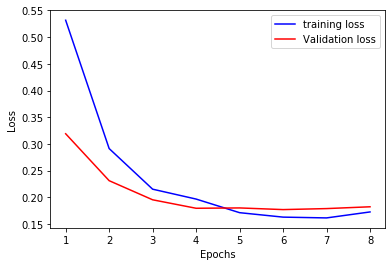

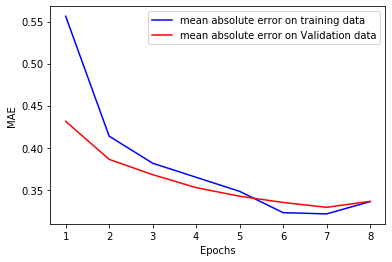

In [87]:
model = Sequential()
#model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(16, activation='relu'))

#model.add(Dense(39, kernel_regularizer = regularizers.l2(0.05), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(16,kernel_regularizer = regularizers.l2(0.05), activation='relu'))

#model.add(Dense(39, kernel_regularizer = regularizers.l1(0.08), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(16, activation='relu'))

model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
model.add(Dropout(0.10))
model.add(Dense(16, activation='relu'))

model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(data, labels, epochs=8, batch_size=26, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on Validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

56/56 [==============================] - 0s 166us/sample - loss: 0.1900 - mean_absolute_error: 0.3454


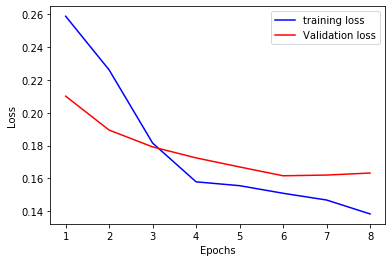

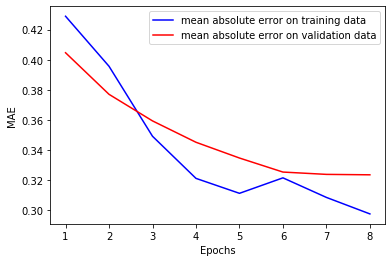

In [88]:
#testing taking one layer off
model = Sequential()
#model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))

#model.add(Dense(39, kernel_regularizer = regularizers.l2(0.05), activation='relu',input_shape=(data.shape[1],)))


#model.add(Dense(39, kernel_regularizer = regularizers.l1(0.08), activation='relu',input_shape=(data.shape[1],)))


model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
model.add(Dropout(0.10))


model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(data, labels, epochs=8, batch_size=26, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()#

56/56 [==============================] - 0s 80us/sample - loss: 0.1607 - mean_absolute_error: 0.3147


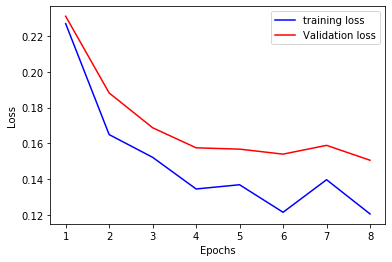

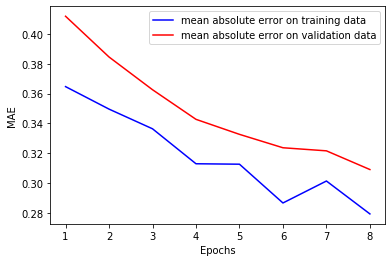

In [89]:
#model.add(Dense(29, activation='relu',input_shape=(data.shape[1],)))

#model.add(Dense(29, kernel_regularizer = regularizers.l2(0.05), activation='relu',input_shape=(data.shape[1],)))


#model.add(Dense(29, kernel_regularizer = regularizers.l1(0.08), activation='relu',input_shape=(data.shape[1],)))


model.add(Dense(29, activation='relu',input_shape=(data.shape[1],)))
model.add(Dropout(0.10))


model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(data, labels, epochs=8, batch_size=26, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

56/56 [==============================] - 0s 81us/sample - loss: 0.1639 - mean_absolute_error: 0.2869


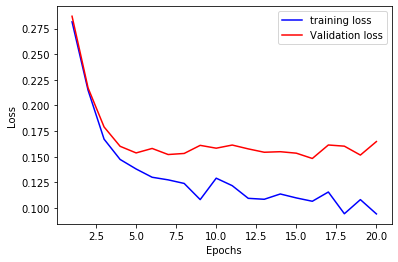

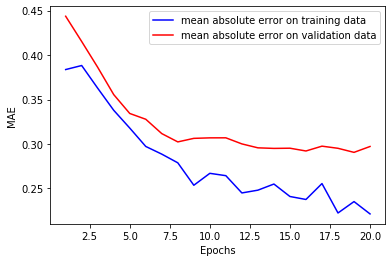

In [90]:
#model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))

#model.add(Dense(39, kernel_regularizer = regularizers.l2(0.05), activation='relu',input_shape=(data.shape[1],)))


#model.add(Dense(39, kernel_regularizer = regularizers.l1(0.08), activation='relu',input_shape=(data.shape[1],)))


model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
model.add(Dropout(0.10))


model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(data, labels, epochs=20, batch_size=26, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

56/56 [==============================] - 0s 131us/sample - loss: 0.1676 - mean_absolute_error: 0.2894


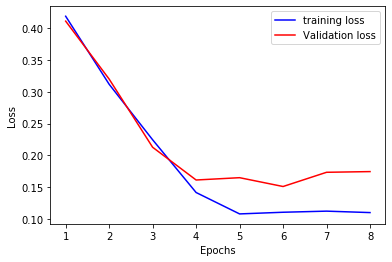

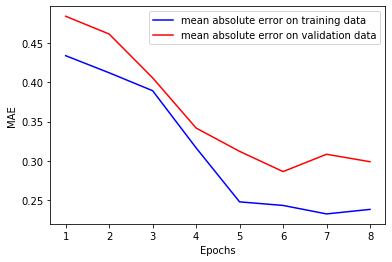

In [91]:
#model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))

#model.add(Dense(39, kernel_regularizer = regularizers.l2(0.05), activation='relu',input_shape=(data.shape[1],)))


#model.add(Dense(39, kernel_regularizer = regularizers.l1(0.08), activation='relu',input_shape=(data.shape[1],)))


model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
model.add(Dropout(0.10))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(data, labels, epochs=8, batch_size=13, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

56/56 [==============================] - 0s 74us/sample - loss: 0.1593 - mean_absolute_error: 0.2944


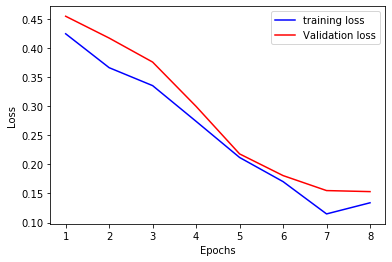

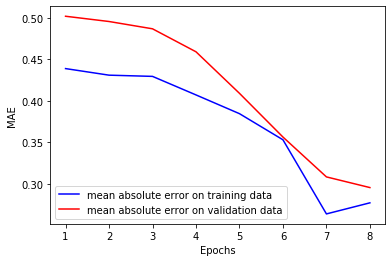

In [92]:
#model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))

#model.add(Dense(39, kernel_regularizer = regularizers.l2(0.05), activation='relu',input_shape=(data.shape[1],)))


#model.add(Dense(39, kernel_regularizer = regularizers.l1(0.08), activation='relu',input_shape=(data.shape[1],)))


model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
model.add(Dropout(0.10))

model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(data, labels, epochs=8, batch_size=20, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

56/56 [==============================] - 0s 199us/sample - loss: 0.1557 - mean_absolute_error: 0.2666


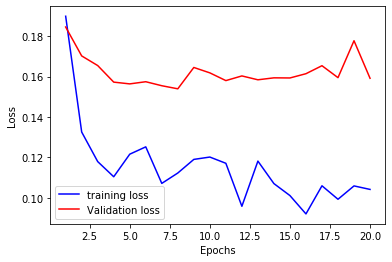

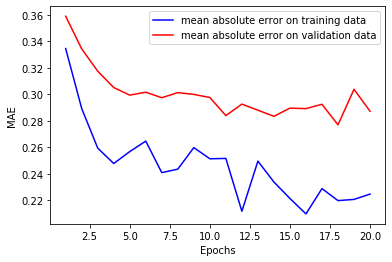

In [93]:
#model.add(Dense(20, activation='relu',input_shape=(data.shape[1],)))

#model.add(Dense(20, kernel_regularizer = regularizers.l2(0.05), activation='relu',input_shape=(data.shape[1],)))


#model.add(Dense(20, kernel_regularizer = regularizers.l1(0.08), activation='relu',input_shape=(data.shape[1],)))


model.add(Dense(20, activation='relu',input_shape=(data.shape[1],)))
model.add(Dropout(0.10))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(data, labels, epochs=20, batch_size=20, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

56/56 [==============================] - 0s 71us/sample - loss: 0.1629 - mean_absolute_error: 0.2560


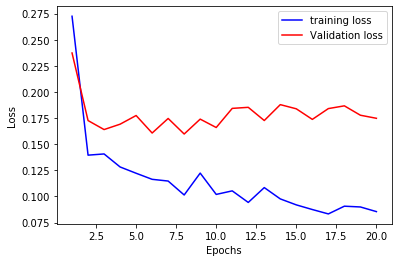

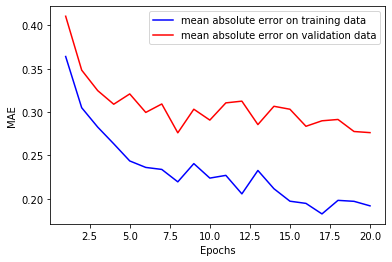

In [94]:
#model.add(Dense(20, activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(15))

#model.add(Dense(20, kernel_regularizer = regularizers.l2(0.05), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(15, kernel_regularizer = regularizers.l2(0.05), activation = 'relu', input_shape=(data.shape[1],)))

#model.add(Dense(20, kernel_regularizer = regularizers.l1(0.08), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(15, activation = 'relu', input_shape=(data.shape[1],)))

model.add(Dense(20, activation='relu',input_shape=(data.shape[1],)))
model.add(Dropout(0.10))
model.add(Dense(15, activation='relu', input_shape=(data.shape[1],)))

model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(data, labels, epochs=20, batch_size=20, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

56/56 [==============================] - 0s 71us/sample - loss: 0.1621 - mean_absolute_error: 0.2524


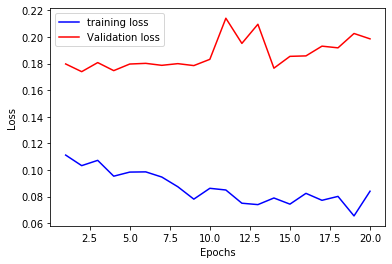

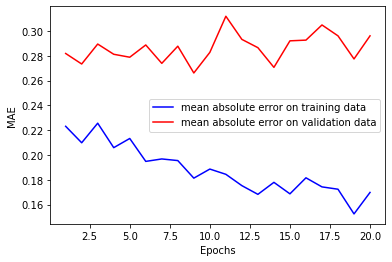

In [95]:
#model.add(Dense(20, activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(15,activation = 'relu'))

#model.add(Dense(20, kernel_regularizer = regularizers.l2(0.05), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(15, kernel_regularizer = regularizers.l2(0.05), activation = 'relu', input_shape=(data.shape[1],)))

#model.add(Dense(20, kernel_regularizer = regularizers.l1(0.08), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(15, activation = 'relu', input_shape=(data.shape[1],)))

model.add(Dense(20, activation='relu',input_shape=(data.shape[1],)))
model.add(Dropout(0.10))
model.add(Dense(15, activation='relu', input_shape=(data.shape[1],)))

model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(data, labels, epochs=20, batch_size=20, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

56/56 [==============================] - 0s 279us/sample - loss: 0.1631 - mean_absolute_error: 0.2454


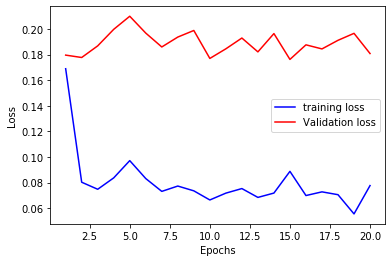

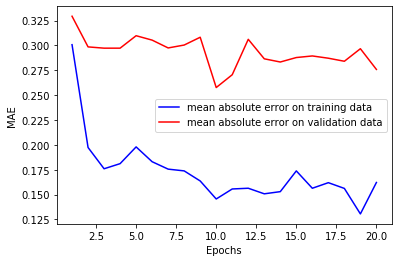

In [96]:
#model.add(Dense(20, activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(30,activation = 'relu'))

#model.add(Dense(20, kernel_regularizer = regularizers.l2(0.05), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(30, kernel_regularizer = regularizers.l2(0.05), activation = 'relu', input_shape=(data.shape[1],)))

#model.add(Dense(20, kernel_regularizer = regularizers.l1(0.08), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(30, activation = 'relu', input_shape=(data.shape[1],)))

model.add(Dense(20, activation='relu',input_shape=(data.shape[1],)))
model.add(Dropout(0.10))
model.add(Dense(30, activation='relu', input_shape=(data.shape[1],)))

model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(data, labels, epochs=20, batch_size=20, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

56/56 [==============================] - 0s 90us/sample - loss: 0.1785 - mean_absolute_error: 0.2598


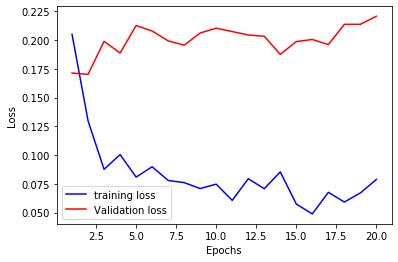

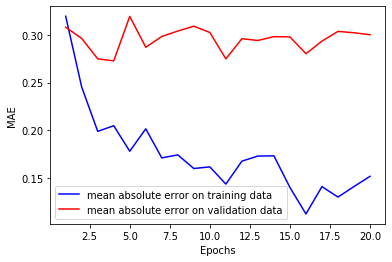

In [97]:
#model.add(Dense(20, activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(10,activation = 'relu'))

#model.add(Dense(20, kernel_regularizer = regularizers.l2(0.05), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(10, kernel_regularizer = regularizers.l2(0.05), activation = 'relu', input_shape=(data.shape[1],)))

#model.add(Dense(20, kernel_regularizer = regularizers.l1(0.08), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(10, activation = 'relu', input_shape=(data.shape[1],)))

model.add(Dense(20, activation='relu',input_shape=(data.shape[1],)))
model.add(Dropout(0.10))
model.add(Dense(10, activation='relu', input_shape=(data.shape[1],)))

model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(data, labels, epochs=20, batch_size=20, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

56/56 [==============================] - 0s 344us/sample - loss: 0.2220 - mean_absolute_error: 0.2851


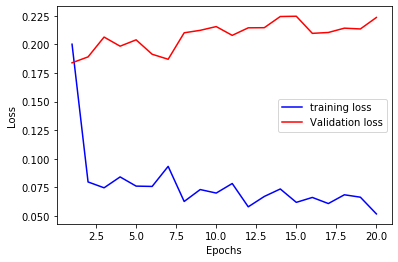

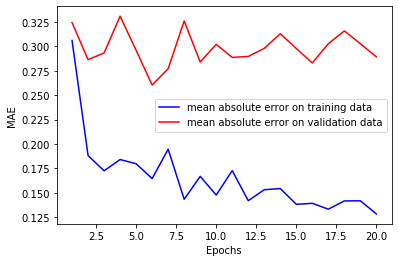

In [98]:
#model.add(Dense(25, activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(10,activation = 'relu'))

#model.add(Dense(25, kernel_regularizer = regularizers.l2(0.05), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(10, kernel_regularizer = regularizers.l2(0.05), activation = 'relu', input_shape=(data.shape[1],)))

#model.add(Dense(25, kernel_regularizer = regularizers.l1(0.08), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(10, activation = 'relu', input_shape=(data.shape[1],)))

model.add(Dense(25, activation='relu',input_shape=(data.shape[1],)))
model.add(Dropout(0.10))
model.add(Dense(10, activation='relu', input_shape=(data.shape[1],)))


model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(data, labels, epochs=20, batch_size=20, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

56/56 [==============================] - 0s 171us/sample - loss: 0.2088 - mean_absolute_error: 0.2977


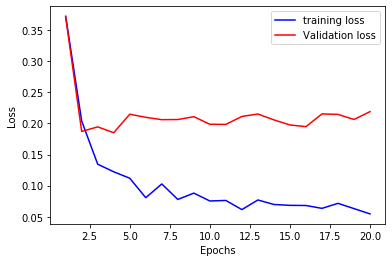

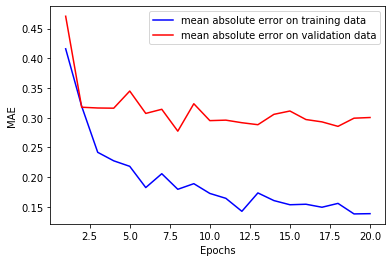

In [99]:
#model.add(Dense(10, activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(10,activation = 'relu'))

#model.add(Dense(10, kernel_regularizer = regularizers.l2(0.05), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(10, kernel_regularizer = regularizers.l2(0.05), activation = 'relu', input_shape=(data.shape[1],)))

#model.add(Dense(10, kernel_regularizer = regularizers.l1(0.08), activation='relu',input_shape=(data.shape[1],)))
#model.add(Dense(10, activation = 'relu', input_shape=(data.shape[1],)))

model.add(Dense(10, activation='relu',input_shape=(data.shape[1],)))
model.add(Dropout(0.10))
model.add(Dense(10, activation='relu', input_shape=(data.shape[1],)))

model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(data, labels, epochs=20, batch_size=20, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

56/56 [==============================] - 0s 0s/sample - loss: 0.1527 - mean_absolute_error: 0.3242


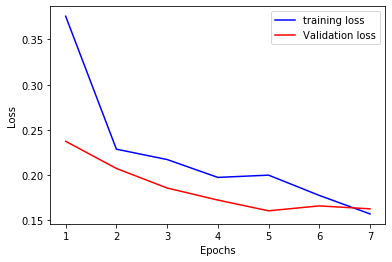

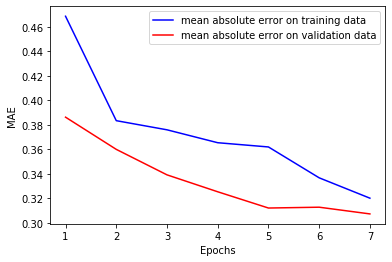

In [100]:
#best model after looking some time
model = Sequential()
#model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))

#model.add(Dense(39, kernel_regularizer = regularizers.l2(0.05), activation='relu',input_shape=(data.shape[1],)))


#model.add(Dense(39, kernel_regularizer = regularizers.l1(0.08), activation='relu',input_shape=(data.shape[1],)))

model.add(Dense(39, activation='relu',input_shape=(data.shape[1],)))
model.add(Dropout(0.10))


model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
history = model.fit(data, labels, epochs=7, batch_size=26, verbose=0, validation_split = 0.2)

#taking history data to differend parametres
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

time = range(1,len(loss)+1)

test_loss, test_mae = model.evaluate(testData, testLabels)

#making test loss diagram
plt.plot(time, loss, 'b-', label="training loss")
plt.plot(time, val_loss, 'r-', label="Validation loss")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#making mean absolute loss diagram
plt.plot(time, mae, 'b-', label="mean absolute error on training data")
plt.plot(time, val_mae, 'r-', label="mean absolute error on validation data")
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()#